## 300_RQ3 - Are heterosexual people more promiscuous?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *

ModuleNotFoundError: No module named 'plotly'

In [3]:
results_sexWork_df = pd.read_csv('../../data/raw/prepped_online_sex_work.csv')
results_sexWork_df.head()

,Gender,Age,Verification,Sexual_orientation,Sexual_polarity,Looking_for,Last_login,Member_since,Number_of_Comments_in_public_forum,Number_of_offline_meetings_attended,Profile_pictures,Risk,Days,Total_chat_time,Friends
0,male,34.6,Non_Verified,Homosexual,Switch,Men,before_10_days,2012-09-17,32,0.0,0.0,No_risk,0,0 days 00:02:00.000000000,1.0
1,male,32.2,Non_Verified,Heterosexual,Dominant,Women,before_1_days,2009-01-11,710,0.0,0.0,No_risk,0,0 days 03:45:00.000000000,7.0
2,male,33.6,Non_Verified,Heterosexual,Dominant,Women,before_3_days,2013-01-04,25,1.0,45.0,No_risk,0,0 days 02:15:00.000000000,3.0
3,male,34.0,Non_Verified,Heterosexual,Dominant,Women,before_4_days,2013-08-04,107,0.0,1.0,No_risk,14,0 days 23:22:00.000000000,12.0
4,male,39.5,Non_Verified,Heterosexual,Dominant,Women,before_5_days,2013-04-14,600,6.0,8.0,No_risk,0,0 days 00:21:00.000000000,35.0


In [4]:
results_sexWork_df['Total_chat_time'] = pd.to_timedelta(results_sexWork_df['Total_chat_time'])

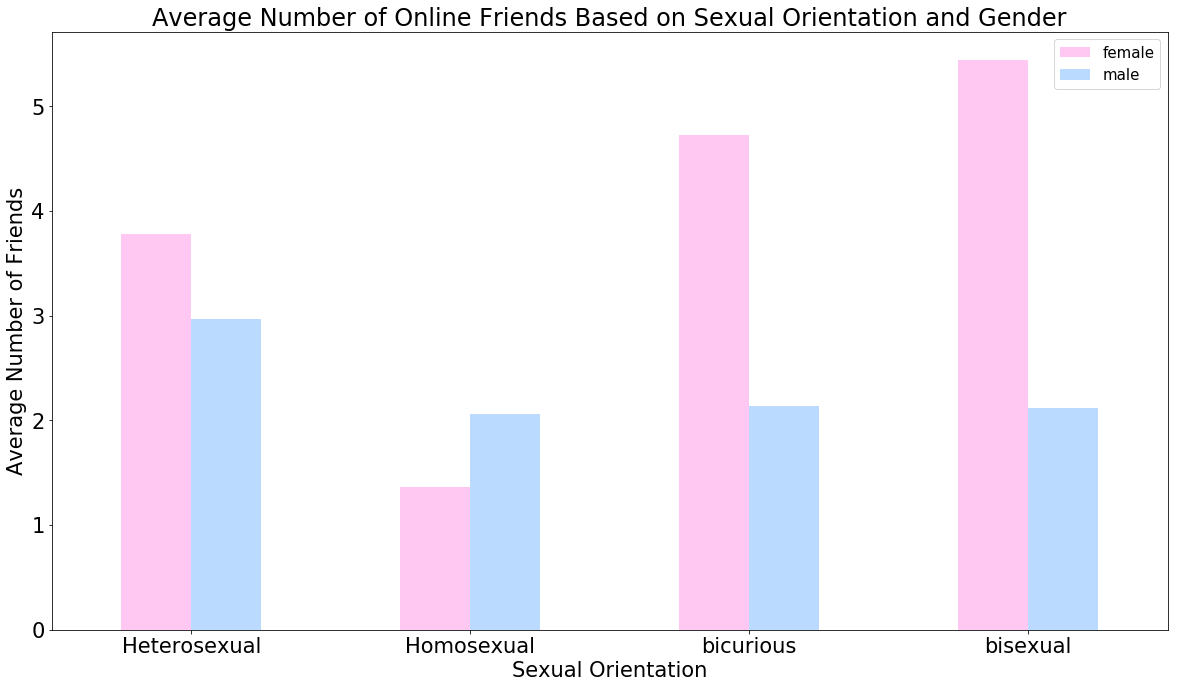

In [9]:
colours = ['#FFC8F2', '#BBDAFF']

sexgroup_friends = results_sexWork_df.groupby(['Sexual_orientation', 'Gender'])['Friends'].mean()

sexgroup_friends = sexgroup_friends.unstack()
graph_sexgroup_friends = sexgroup_friends.plot(kind='bar', figsize=(20, 11), color=colours, rot=0, fontsize=21)

graph_sexgroup_friends.set_title('Average Number of Online Friends Based on Sexual Orientation and Gender', fontsize=24)
graph_sexgroup_friends.set_xlabel('Sexual Orientation', fontsize=21)
graph_sexgroup_friends.set_ylabel('Average Number of Friends', fontsize=21)
graph_sexgroup_friends.legend(
   loc='best',
   ncol=1,
   markerscale=1.5,
   fontsize=15)

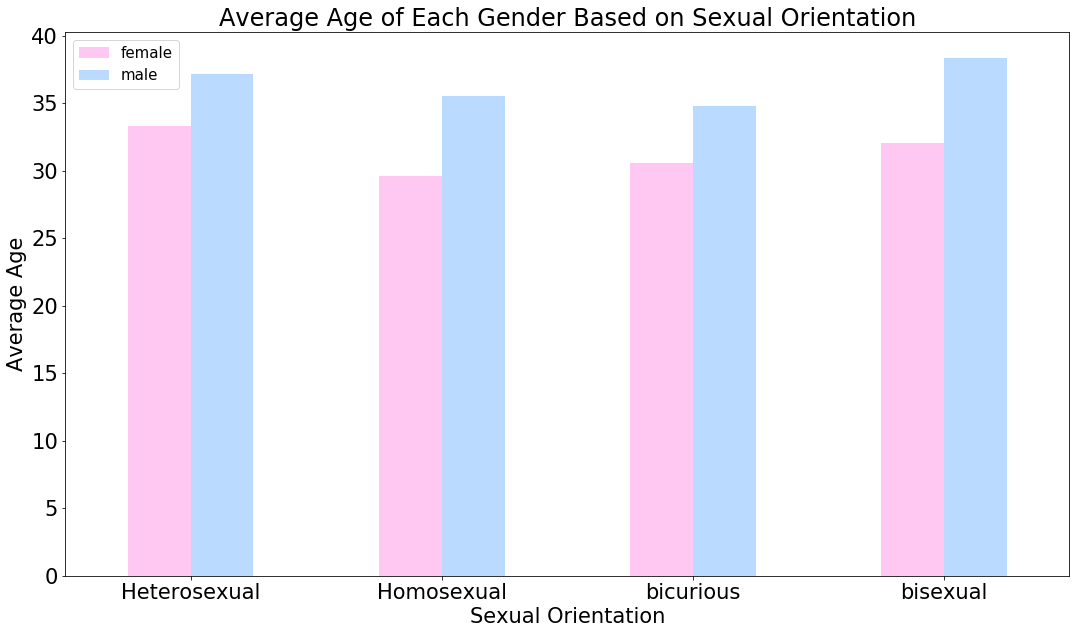

In [117]:
colours = ['#FFC8F2', '#BBDAFF']

sexgroup_age = results_sexWork_df.groupby(['Sexual_orientation', 'Gender'])['Age'].mean()

sexgroup_age = sexgroup_age.unstack()
graph_sexgroup_age = sexgroup_age.plot(kind='bar', figsize=(18, 10), color=colours, rot=0, fontsize=21)


graph_sexgroup_age.set_title('Average Age of Each Gender Based on Sexual Orientation', fontsize=24)
graph_sexgroup_age.set_xlabel('Sexual Orientation', fontsize=21)
graph_sexgroup_age.set_ylabel('Average Age', fontsize=21)
graph_sexgroup_age.legend(
   loc='best',
   ncol=1,
   markerscale=1.5,
   fontsize=15)

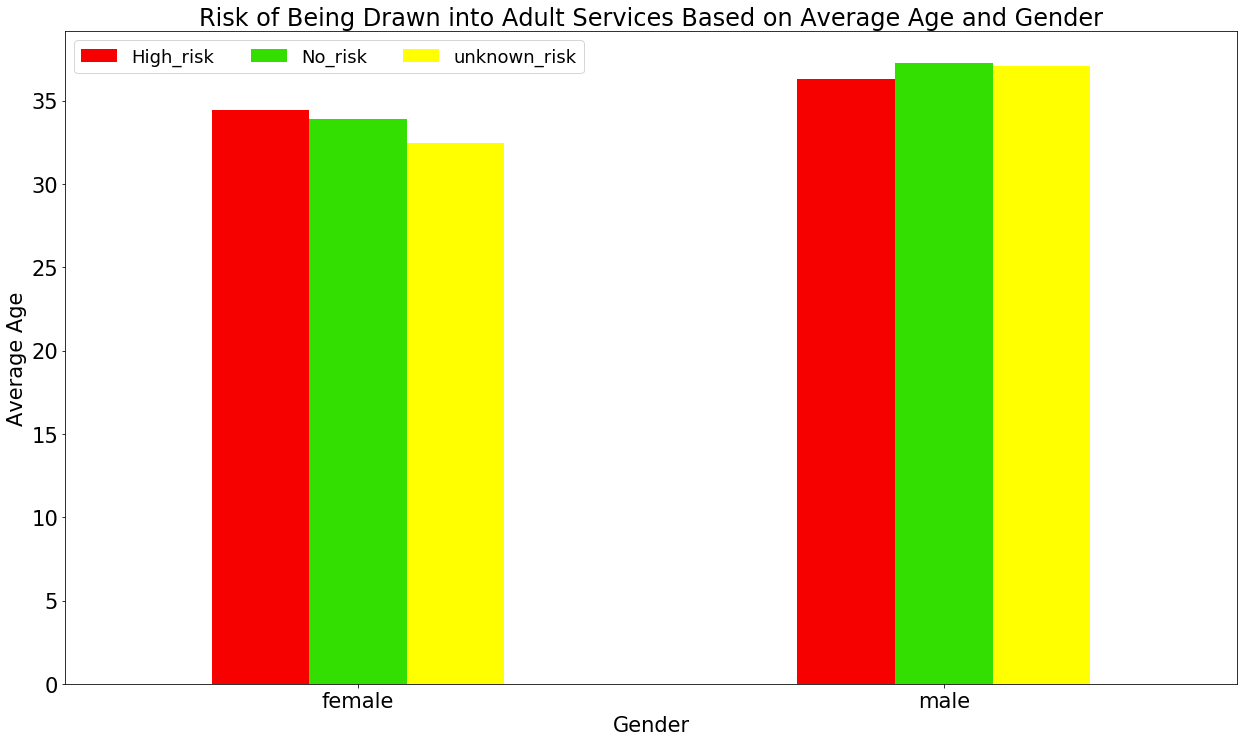

In [112]:
colours = ['#F70000', '#32DF00', '#FFFF00']

gender_age_risk = results_sexWork_df.groupby(['Gender', 'Risk'])['Age'].mean()

gender_age_risk = gender_age_risk.unstack()
graph_gender_age_risk = gender_age_risk.plot(kind='bar', figsize=(21, 12), color=colours, rot=0, fontsize=21)

graph_gender_age_risk.set_title('Risk of Being Drawn into Adult Services Based on Average Age and Gender', fontsize=24)
graph_gender_age_risk.set_xlabel('Gender', fontsize=21)
graph_gender_age_risk.set_ylabel('Average Age', fontsize=21)
graph_gender_age_risk.legend(
   loc='best',
   ncol=3,
   markerscale=2.5,
   fontsize=18)

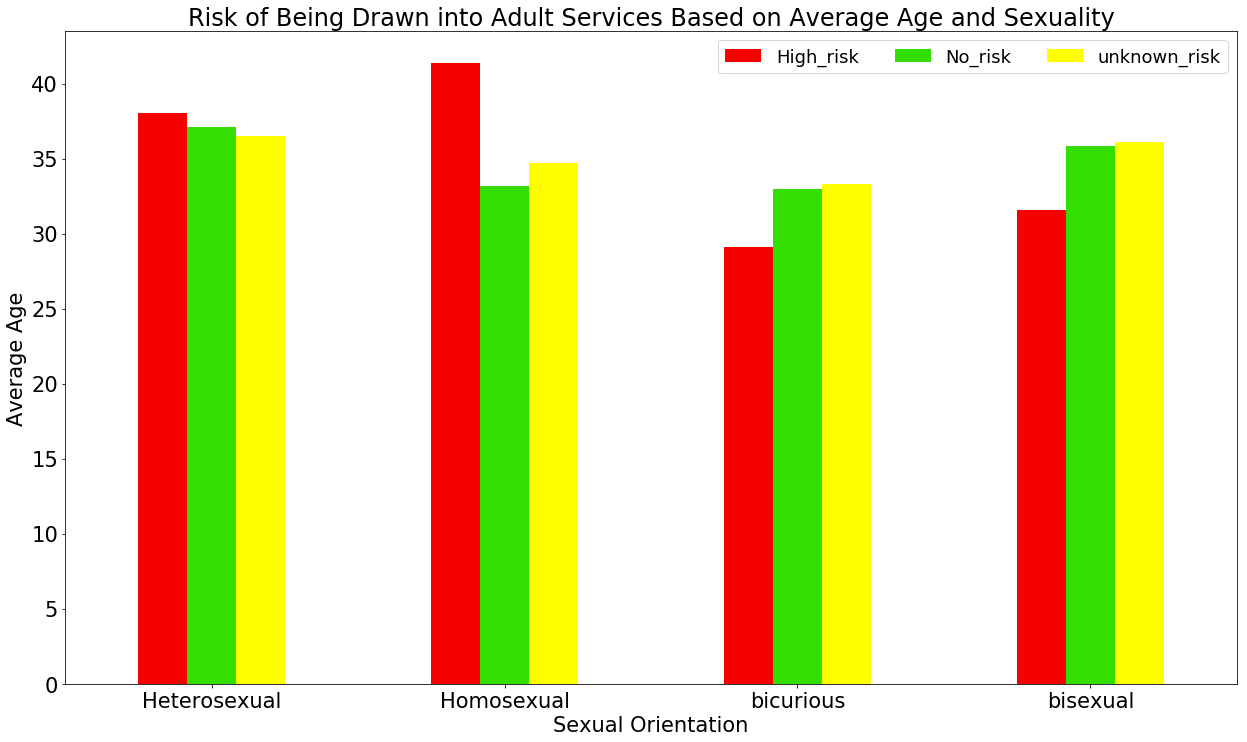

In [111]:
colours = ['#F70000', '#32DF00', '#FFFF00']

sexuality_age_risk = results_sexWork_df.groupby(['Sexual_orientation', 'Risk'])['Age'].mean()

sexuality_age_risk = sexuality_age_risk.unstack()
graph_sexuality_age_risk = sexuality_age_risk.plot(kind='bar', figsize=(21, 12), color=colours, rot=0, fontsize=21)

graph_sexuality_age_risk.set_title('Risk of Being Drawn into Adult Services Based on Average Age and Sexuality', fontsize=24)
graph_sexuality_age_risk.set_xlabel('Sexual Orientation', fontsize=21)
graph_sexuality_age_risk.set_ylabel('Average Age', fontsize=21)
graph_sexuality_age_risk.legend(
   loc='best',
   ncol=3,
   markerscale=2.5,
   fontsize=18)

## Reddit Thread

In [60]:
results_redditThread_df = pd.read_csv('../../data/raw/prepped_foreveralone.csv')
results_redditThread_df.head()

,gender,sexuality,age,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,edu_level
0,Male,Straight,35,White non-Hispanic,Normal weight,Yes,No,No,0,Yes,Associate degree
1,Male,Bisexual,21,White non-Hispanic,Underweight,Yes,No,No,0,Yes,"Some college, no degree"
2,Male,Straight,22,White non-Hispanic,Overweight,Yes,No,No,10,Yes,"Some college, no degree"
3,Male,Straight,19,White non-Hispanic,Overweight,Yes,Yes,No,8,Yes,"Some college, no degree"
4,Male,Straight,23,White non-Hispanic,Overweight,No,No,Yes and I have,10,No,"High school graduate, diploma or the equivalen..."


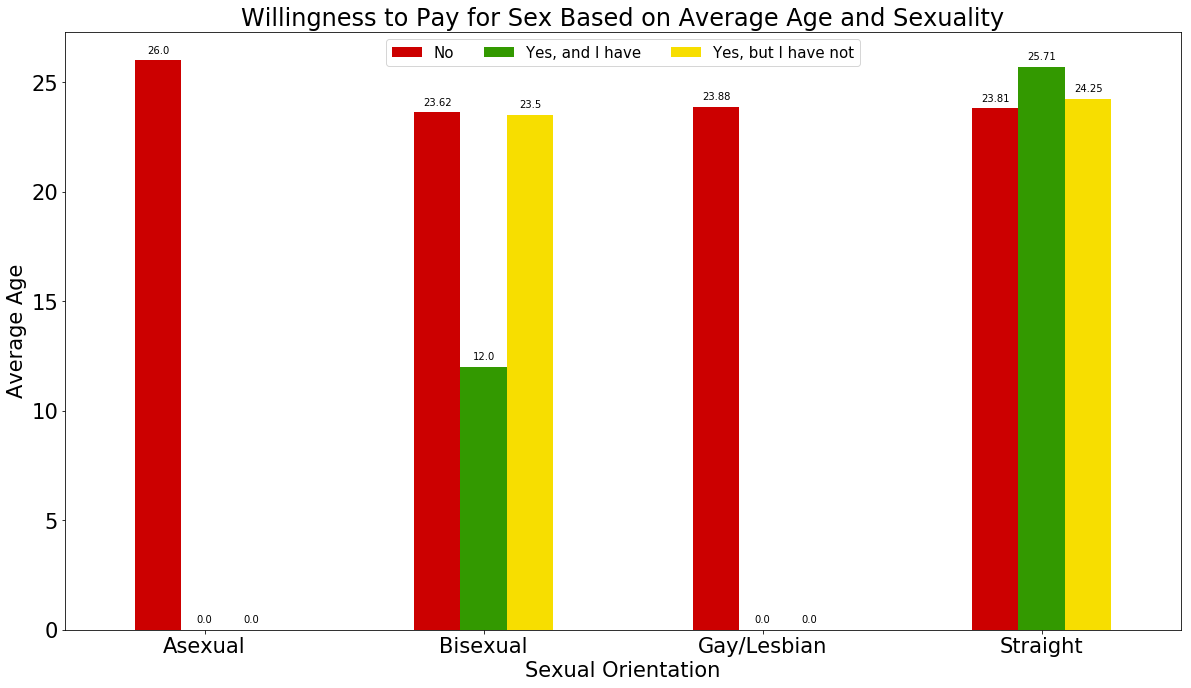

In [113]:
colours = ['#CC0000', '#339900', '#F7DE00']

sexuality_pay_age = results_redditThread_df.groupby(['sexuality', 'pay_for_sex'])[['age']].mean()

sexuality_pay_age = sexuality_pay_age.unstack()
graph_sexuality_pay_age = sexuality_pay_age.plot(kind='bar', figsize=(20, 11), color=colours, rot=0, fontsize=21)

#includes the value of each bar
for p in graph_sexuality_pay_age.patches: 
    graph_sexuality_pay_age.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

graph_sexuality_pay_age.set_title('Willingness to Pay for Sex Based on Average Age and Sexuality', fontsize=24)
graph_sexuality_pay_age.set_xlabel('Sexual Orientation', fontsize=21)
graph_sexuality_pay_age.set_ylabel('Average Age', fontsize=21)
graph_sexuality_pay_age.legend(
   ['No', 'Yes, and I have', 'Yes, but I have not'],
   loc='upper center',
   ncol=3,
   markerscale=2.5,
   fontsize=15)

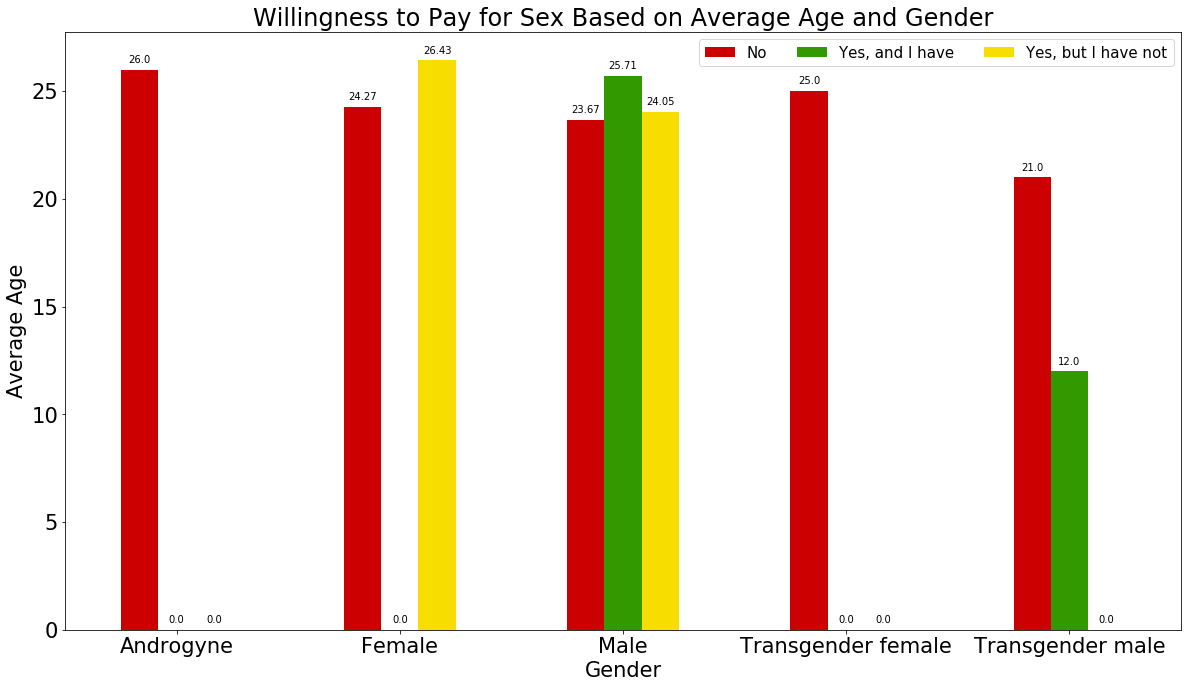

In [114]:
colours = ['#CC0000', '#339900', '#F7DE00']

gender_pay_age = results_redditThread_df.groupby(['gender', 'pay_for_sex'])[['age']].mean()

gender_pay_age = gender_pay_age.unstack()
graph_gender_pay_age = gender_pay_age.plot(kind='bar', figsize=(20, 11), color=colours, rot=0, fontsize=21)

#includes the value of each bar
for p in graph_gender_pay_age.patches: 
    graph_gender_pay_age.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

graph_gender_pay_age.set_title('Willingness to Pay for Sex Based on Average Age and Gender', fontsize=24)
graph_gender_pay_age.set_xlabel('Gender', fontsize=21)
graph_gender_pay_age.set_ylabel('Average Age', fontsize=21)
graph_gender_pay_age.legend(
   ['No', 'Yes, and I have', 'Yes, but I have not'],
   loc='upper right',
   ncol=3,
   markerscale=2.5,
   fontsize=15)